In [37]:
# import the important Libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics 
sns.set(style="whitegrid")
import plotly.express as px

In [38]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [39]:
heart = pd.read_csv('heart.csv')

In [40]:
# Shape of Data Set
heart.shape

(303, 14)

In [41]:
# Preview the Data Set
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
# Get the Summary of Data Set
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [43]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [44]:
heart.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
# View columns name
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [46]:
heart['target'].nunique()

2

In [47]:
heart['target'].unique()

array([1, 0], dtype=int64)

In [48]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

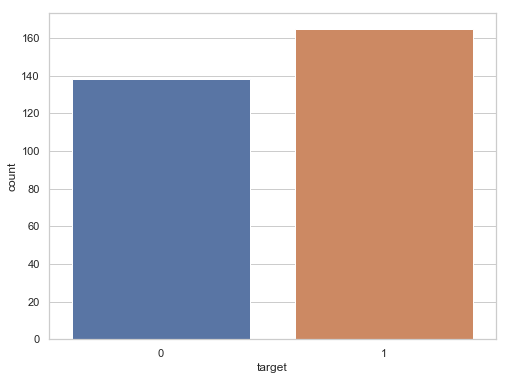

In [49]:
# Now for Visualisation over Target
f,ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target",data=heart);
plt.show

In [50]:
#checking the frequency with gender
heart.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

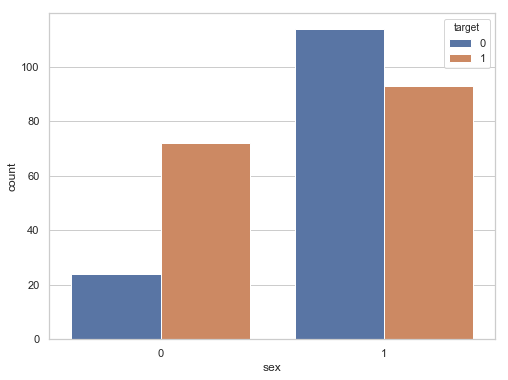

In [51]:
# Now for Visualisation over Sex with Target columns
f,ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex",hue='target',data=heart);
plt.show

In [52]:
cor = heart.corr()

In [53]:
cor['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [54]:
fig = px.bar(heart, x="cp",  color='cp')
fig.show()

In [55]:
fig = px.bar(heart, x="cp", y="target", color="cp", barmode="group",
             facet_row="cp",)
plt.savefig('Log_bar')
fig.show()

<Figure size 432x288 with 0 Axes>

In [56]:
fig = px.line(heart,x="thalach", y="target", title='Thalach')
fig.show()

In [57]:
fig = px.histogram(heart, x="thalach", y="target", color="target")
plt.savefig('Log_histogram')
fig.show()

<Figure size 432x288 with 0 Axes>

In [58]:
# check for missing values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

age 
-------------------------------------
count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


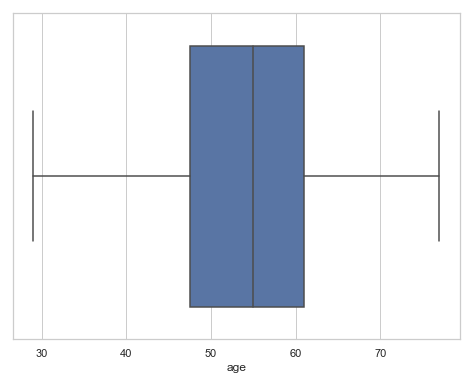

-------------------------------------

trestbps 
-------------------------------------
count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


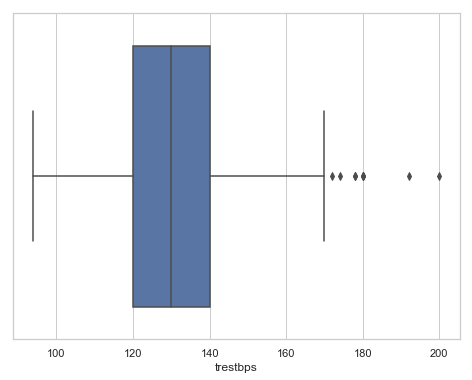

-------------------------------------

chol 
-------------------------------------
count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64


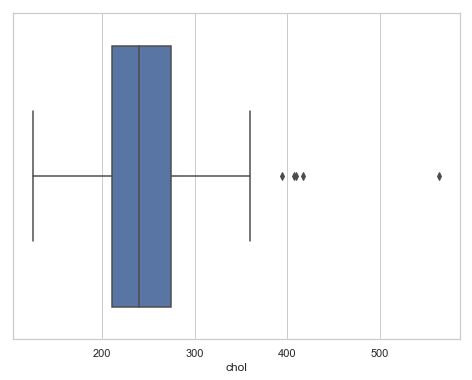

-------------------------------------

thalach 
-------------------------------------
count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64


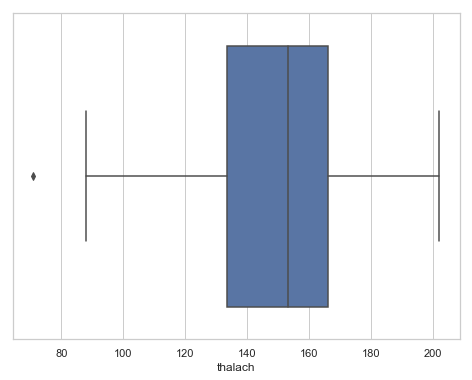

-------------------------------------

oldpeak 
-------------------------------------
count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64


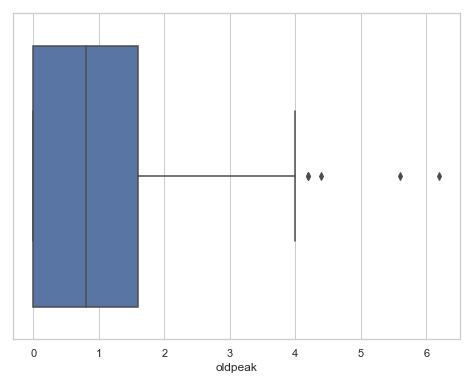

-------------------------------------



In [59]:
#create boxPlot for visualise outliers 
custom_colum = ['age','trestbps','chol','thalach','oldpeak']
for i in custom_colum:
    x = heart[i].describe()
    print(i,'\n-------------------------------------')
    print(x)
    f, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(x=heart[i])
    plt.show()
    print('-------------------------------------\n')


In [60]:
# Implementation of Logistics Regression 
# Creating Dummy Variables
a = pd.get_dummies(heart['cp'], prefix = "cp")
b = pd.get_dummies(heart['thal'], prefix = "thal")
c = pd.get_dummies(heart['slope'], prefix = "slope")

In [61]:
frame = [heart,a,b,c]
heart = pd.concat(frame,axis=1)

In [62]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [63]:
heart = heart.drop(columns=['cp','thal','slope'])

In [64]:
heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [65]:
X = heart.loc[:, heart.columns != 'target']
y = heart.loc[:, heart.columns == 'target']

In [66]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [67]:
y.columns

Index(['target'], dtype='object')

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 
   
# create logistic regression object 
print(X_train.columns)
print('-------------------------------')
reg = linear_model.LogisticRegression() 
   
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = reg.predict(X_test) 
   
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred)*100) 

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')
-------------------------------
<bold>Logistic Regression model accuracy(in %):</bold> 77.8688524590164


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[43 15]
 [12 52]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        58
           1       0.78      0.81      0.79        64

   micro avg       0.78      0.78      0.78       122
   macro avg       0.78      0.78      0.78       122
weighted avg       0.78      0.78      0.78       122



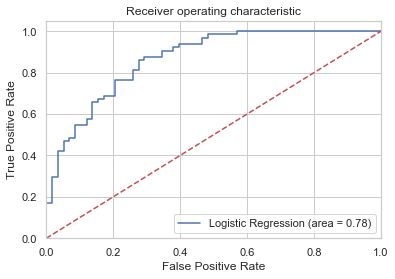

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()